In [5]:
import csv 
import requests
import wikipediaapi
import classes as cs
import json
import networkx as nx
import graph_networkx as gnx
import nx_altair as nxa

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Testing file: so that I don't have to contstantly rerun

In [7]:
graph = gnx.createMyGraph()

#print(graph.nodes)
#returns info --  print(mygraph.nodes['Katy Perry'])


Nodes: 271
Edges: 386
['Taylor Swift', 'pop', 'The Weeknd', 'canadian contemporary r&b', 'canadian pop', 'Daft Punk', 'electro', 'filter house', 'rock', 'Justin Bieber', 'Drake', 'canadian hip hop', 'hip hop', 'pop rap', 'rap', 'Yeat', 'pluggnb', 'rage rap', 'Ariana Grande', 'Bad Bunny', 'reggaeton', 'trap latino', 'urbano latino', 'Feid', 'colombian pop', 'pop reggaeton', 'reggaeton colombiano', 'Rihanna', 'barbadian pop', 'urban contemporary', 'Calvin Harris', 'dance pop', 'edm', 'electro house', 'house', 'pop dance', 'progressive house', 'uk dance', 'Ed Sheeran', 'singer-songwriter pop', 'uk pop', 'Dua Lipa', 'Coldplay', 'permanent wave', 'Marshmello', 'brostep', 'progressive electro house', 'Manuel Turizo', 'Doja Cat', 'David Guetta', 'big room', 'Bebe Rexha', 'Eminem', 'detroit hip hop', 'Bruno Mars', 'Billie Eilish', 'art pop', 'Sia', 'australian dance', 'australian pop', 'SZA', 'r&b', 'Kanye West', 'chicago rap', 'Dwele', 'neo soul', 'Miley Cyrus', 'Travis Scott', 'slap house', 

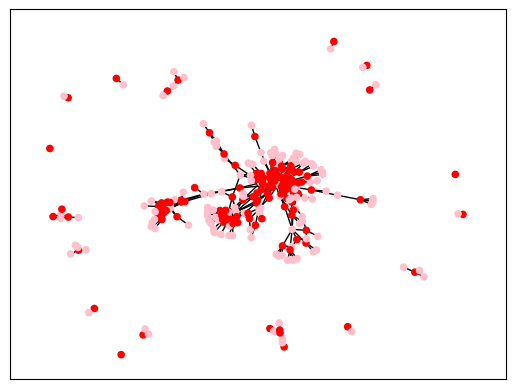

In [27]:

color_map = []
for node in graph:
    values = graph.nodes[node]
    if values['type'] == 'artist':
        color_map.append('red') #artist
    else: 
        color_map.append('pink') #genre

nx.draw_networkx(graph,with_labels=False,node_color=color_map,node_size=20) #.interactive()